In [26]:
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader
from plotter import TensorboardPlotter
from dataset import SingleTaskDataset
from model import SingleTaskMLP
import matplotlib.pyplot as plt

import shap

In [27]:
# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device : ", device)

# Load model
model1 = SingleTaskMLP(hidden_unit=128, class_type=1)
model1.to(device)
model1.load_state_dict(torch.load('./model/singleTask/smote_1.pth', map_location=device))

model2 = SingleTaskMLP(hidden_unit=128, class_type=2)
model2.to(device)
model2.load_state_dict(torch.load('./model/singleTask/smote_2.pth', map_location=device))
print("Model loaded")

Device :  cpu
Model loaded


In [28]:
test_data1 = SingleTaskDataset(mode='test', class_type=1)
test_data2 = SingleTaskDataset(mode='test', class_type=2)

In [29]:
test_data1_features = test_data1.features
test_data2_features = test_data2.features

# convert into Tensor
test_data1_features = torch.from_numpy(test_data1_features).float()
test_data2_features = torch.from_numpy(test_data2_features).float()


In [30]:
explainer1 = shap.DeepExplainer(model1, test_data1_features)
explainer2 = shap.DeepExplainer(model2, test_data2_features)

shap_values1 = explainer1.shap_values(test_data1_features)
shap_values2 = explainer2.shap_values(test_data2_features)


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [31]:
print(shap_values1.shape)

(572, 16)


In [32]:
# '진단시점나이'를 age 로 변환
feature_names = test_data1.feature_names

for name in feature_names:
    if name == '진단시점나이':
        feature_names[feature_names.index(name)] = 'age'
print(feature_names)

['Gender', 'age', 'CMV IgM[Serum]', 'CMV IgG[Serum]', 'HSV IgM[Serum]', 'VZV IgM[Serum]', 'VZV IgG[Serum]', 'WBC COUNT[Whole blood]', 'Lymphocyte(#)[Whole blood]', 'Lymphocyte(%)[Whole blood]', 'Monocyte(#)[Whole blood]', 'Monocyte(%)[Whole blood]', 'Neutrophil(#)[Whole blood]', 'Neutrophil(%)[Whole blood]', 'ESR[Whole blood]', 'CRP[Serum]']


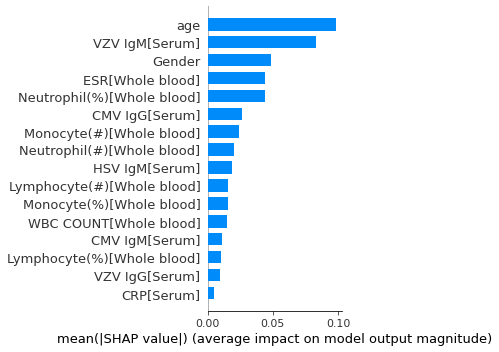

In [33]:
shap.summary_plot(shap_values1, test_data1_features, plot_type="bar", feature_names=feature_names, plot_size=(5,5))

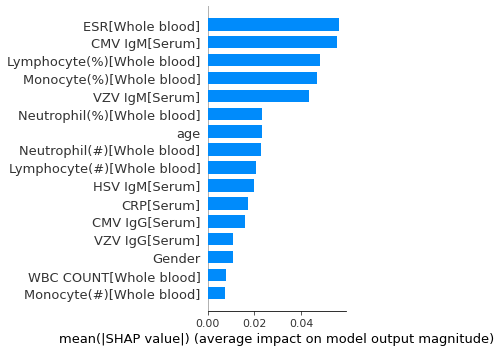

In [34]:
shap.summary_plot(shap_values2, test_data2_features, plot_type="bar", feature_names=feature_names, plot_size=(5,5))